Edoardo Merli edoardo.merli@studio.unibo.it

1. The data are split in two files, load the files and merge them
according to the first column, which is the index; both the files
contain a "class" column, keep both the columns in the merged
file calling them "class_x" and "class_y" (you can use the merge
function of pandas dataframes)

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

random_state = 42

In [11]:
file1 = 'exam_1.csv'
file2 = 'exam_2.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [12]:
df1.head()

,Unnamed: 0,A,C,E,class
0,0,-0.386248,1.536628,1.232589,1
1,1,-2.686649,4.640702,0.823433,1
2,2,0.474124,1.576616,-1.256234,0
3,3,-1.343790,-0.514008,1.520392,2
4,4,-2.187600,0.289041,1.318321,2


In [13]:
df2.head()

,Unnamed: 0,B,D,F,class
0,0,-1.432057,1.039420,0.280469,1
1,1,-4.036329,0.526320,-0.419013,1
2,2,0.179770,0.157974,-0.162869,0
3,3,-1.299109,-0.152250,0.045123,2
4,4,-2.089699,-0.494995,-0.661858,2


In [25]:
df1.rename(columns={'class':'class_x'}, inplace=True)
df2.rename(columns={'class':'class_y'}, inplace=True)
df = pd.merge(df1, df2)
df.head()

,Unnamed: 0,A,C,E,class_x,B,D,F,class_y
0,0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469,1
1,1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013,1
2,2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869,0
3,3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123,2
4,4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858,2


2. Delete all the rows where class_x is different from class_y, then
drop class_y and rename class_x as class

In [44]:
df = df[df['class_x'] == df['class_y']]

In [47]:
df = df.drop('class_y', axis=1)
df.rename(columns={'class_x': 'class'}, inplace=True)
df.head()

,Unnamed: 0,A,C,E,class,B,D,F
0,0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469
1,1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013
2,2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869
3,3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123
4,4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858


3. Reorder the columns in alphabetical order, but placing the class
column as the last one; the cleaned dataframe must be named
df; show its size and head

In [59]:
df = df[['Unnamed: 0', 'A', 'B', 'C', 'D', 'E', 'F', 'class']]
print(f"The shape of the dataframe is {df.shape}")
print("The head of the dataframe is:")
df.head()

The shape of the dataframe is (1984, 8)
The head of the dataframe is:


,Unnamed: 0,A,B,C,D,E,F,class
0,0,-0.386248,-1.432057,1.536628,1.039420,1.232589,0.280469,1
1,1,-2.686649,-4.036329,4.640702,0.526320,0.823433,-0.419013,1
2,2,0.474124,0.179770,1.576616,0.157974,-1.256234,-0.162869,0
3,3,-1.343790,-1.299109,-0.514008,-0.152250,1.520392,0.045123,2
4,4,-2.187600,-2.089699,0.289041,-0.494995,1.318321,-0.661858,2


4. Find the best classification scheme using three classification
methods

In [64]:
X = df.drop(['Unnamed: 0', 'class'], axis=1)
y = df['class']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [65]:
model_lbls = [
       'dt', 
       'nb', 
       'knn',
       ]

# Parameters by cross-validation
params_dt = [{'max_depth': list(range(1,20))}]
params_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]
params_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': params_dt,
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': params_nb
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': params_knn
       }
}

score = 'accuracy'

In [79]:
def print_results(model):
    print("Best parameters set found on train set:")
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()

5. For each classification method find the best parameter setting
with cross validation on the training set

In [82]:
final_report = {score: []}
confusion_matrices = {}
for model_type in model_lbls:
    model_type_dict = models[model_type]
    print("--------------------------------------------")
    print(f"Trying model {model_type_dict['name']}")
    classifier = GridSearchCV(estimator=model_type_dict['estimator'], param_grid=model_type_dict['param'], scoring=score, error_score='raise')
    classifier.fit(Xtrain, ytrain)
    print_results(classifier)
    ypred = classifier.best_estimator_.predict(Xtest)
    final_report[score].append(accuracy_score(ytest, ypred))
    cm = confusion_matrix(ytest, ypred)
    confusion_matrices[model_type_dict['name']] = cm

--------------------------------------------
Trying model Decision Tree       
Best parameters set found on train set:
{'max_depth': 6}

--------------------------------------------
Trying model Gaussian Naive Bayes
Best parameters set found on train set:
{'var_smoothing': 0.1}

--------------------------------------------
Trying model K Nearest Neighbor 
Best parameters set found on train set:
{'n_neighbors': 9}



6. For each classification method compute the accuracy and the
confusion matrix on the test set

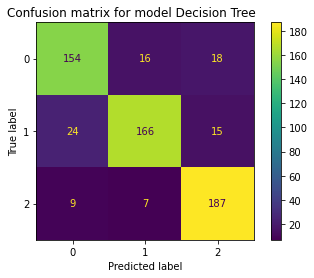

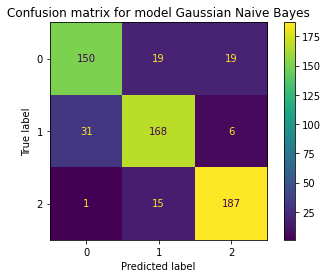

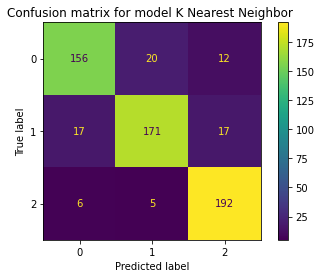

In [94]:
for model, cm in confusion_matrices.items():
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    disp.ax_.set_title(f"Confusion matrix for model {model}")

In [99]:
results_df = pd.DataFrame(data=final_report, index=model_lbls)
results_df

,accuracy
dt,0.850671
nb,0.847315
knn,0.870805


K Nearest Neighbours obtains the best accuracy on the testing set

7. Produce a plot of the accuracies given by the methods
attempted

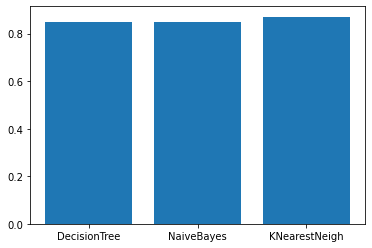

In [101]:
plt.bar(['DecisionTree','NaiveBayes','KNearestNeigh'], results_df['accuracy'])
plt.show()